### Chess Games
To begin, we need to prepare the data that is readily available for us in `games.csv`. There are 6 columns that will be kept which are turns, white_rating, black_rating, rated, winner and first_move. From all of these columns, we will have to parse the moves column to receive the first_move and then use one hot encoding to successfully run our algorithms on the categorical data. 

Number of entries: 18132
Number of features: 6
   turns  white_rating  black_rating  rated winner  first_move_Nc3  \
1     16          1322          1261   True  black           False   
2     61          1496          1500   True  white           False   
3     61          1439          1454   True  white           False   
4     95          1523          1469   True  white           False   
6     33          1520          1423   True  white           False   
8     66          1439          1392   True  black           False   
9    119          1381          1209   True  white           False   

   first_move_Nf3  first_move_Nh3  first_move_a3  first_move_a4  ...  \
1           False           False          False          False  ...   
2           False           False          False          False  ...   
3           False           False          False          False  ...   
4           False           False          False          False  ...   
6           False           Fals

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


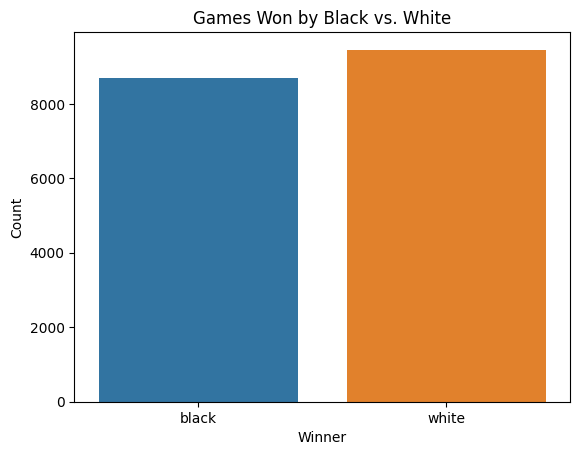

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import constants
# Load your dataset
d = pd.read_csv('./datasets/games.csv')
# filtered_data = d[(d['turns'] >= 15) | (d['victory_status'] != 'draw') | (d['winner'] != 'draw')].copy()# Use .copy() to ensure you are working on a copy
filtered_data = d[(d['turns'] >= 15) & (d['winner'] != 'draw')].copy()

# Define the target column and set random_state
target_column = 'winner'

# parse out the first move
filtered_data['moves'] = filtered_data['moves'].str.split()
filtered_data['first_move'] = filtered_data['moves'].str[0]
# filtered_data['second_move'] = filtered_data['moves'].str[1] #TODO: If I want to include the second move

# List the columns to keep - and drop the rest 
columns_to_keep = ["turns", "white_rating", "black_rating", "rated", "winner", "first_move"]
data = filtered_data[columns_to_keep]

# Create one-hot encoding for the "first_move" column, and drop the first_move column
one_hot_encoded = pd.get_dummies(data['first_move'], prefix='first_move', drop_first=True)
data_encoded = pd.concat([data, one_hot_encoded], axis=1)
data_encoded = data_encoded.drop(columns=['first_move'])

# Set the X and y for the data 
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

# Print out data and stats to ensure correct
num_entries = data.shape[0]
print("Number of entries:", num_entries)
num_features = data.shape[1]
print("Number of features:", num_features)
print(data_encoded.head(7))
counts = data_encoded['winner'].value_counts()
print("counts", counts)
sns.countplot(data=data_encoded, x='winner')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.title('Games Won by Black vs. White')
plt.show()

Next we must split the data into the training and tests set. 

In [2]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=constants.TEST_SIZE, random_state=constants.RANDOM_STATE)

### Decision Tree
Train using the values for a decision tree, and then plot the learning curve using the cross validation value set globally.

In [ ]:
from dt import dt
best_dt_model, best_dt_params = dt(X_train, X_test, y_train, y_test, constants.CV)


In [ ]:
from graphs import plot_learning_curve
plot_learning_curve(best_dt_model, X_train, y_train, cv=constants.CV, scoring='accuracy', title="Decision Tree Learning Curve")

### Neural Networks

In [ ]:
from nn import nn
best_nn_model, best_nn_params = nn(X_train, X_test, y_train, y_test, constants.CV)

In [ ]:
plot_learning_curve(best_nn_model, X_train, y_train, cv=constants.CV, scoring='accuracy', title="Decision Tree Learning Curve")

### K-Nearest Neighbors

In [ ]:
from knn import knn
best_knn_model, best_knn_params = knn(X_train, X_test, y_train, y_test, constants.CV)

In [ ]:
from graphs import plot_learning_curve
plot_learning_curve(best_knn_model, X_train, y_train, cv=constants.CV, scoring='accuracy', title="K-NN Learning Curve")

### Boosted Decision Tree Classifier

In [ ]:
from dt import ada_boosted_dt
best_bdt_model, best_bdt_params = ada_boosted_dt(X_train, X_test, y_train, y_test, constants.CV)


In [ ]:
from graphs import plot_learning_curve
plot_learning_curve(best_bdt_model, X_train, y_train, cv=constants.CV, scoring='accuracy', title="Decision Tree with Ada Boosting Learning Curve")

### Support Vector Machine


In [6]:
from svm import svm
from sklearn.preprocessing import StandardScaler

# We need to scale the data before we pass it to the SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pass the scaled data to the svm
best_svm_model, best_svm_params = svm(X_train_scaled, X_test_scaled, y_train, y_test, constants.CV)


In [ ]:
from graphs import plot_learning_curve
plot_learning_curve(best_svm_model, X_train_scaled, y_train, cv=constants.CV, scoring='accuracy', title="SVM Learning Curve")